In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


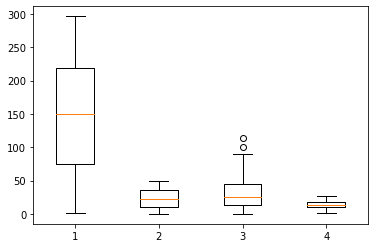

In [9]:
plt.boxplot(df)
plt.show()

In [10]:
a = df[df["Newspaper"]>90]

In [11]:
a

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


# 1. Linearity

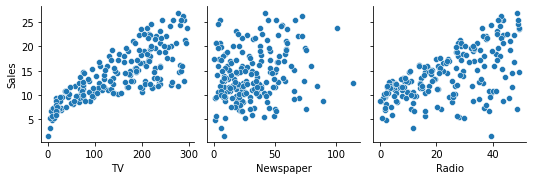

In [12]:
sns.pairplot(df,x_vars=['TV',"Newspaper","Radio"],y_vars=['Sales'])
plt.show()

There is linear relation between Radio and TV with Sales
Newspaper is Scatterd

# 2. No or Multicollinearity

<AxesSubplot:>

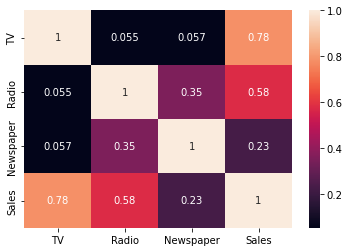

In [13]:
sns.heatmap(df.corr(),annot=True)

No multicollinearity as no independent variable has much correlation between them

# 3. Mean of Residuals

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
x = df[['Newspaper','TV','Radio']]
y = df[['Sales']]


In [16]:
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [17]:
y_pred = LR.predict(x)

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y, y_pred)

0.8972106381789522

In [20]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred)
MSE

2.784126314510936

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_pred)

1.2520112296870685

In [22]:
#Adding columns for y-predict and Residuals

df1 = df.copy()

df1['Y-predict'] = y_pred
df1['Residuals'] = y-y_pred

df1

,TV,Radio,Newspaper,Sales,Y-predict,Residuals
0,230.1,37.8,69.2,22.1,20.523974,1.576026
1,44.5,39.3,45.1,10.4,12.337855,-1.937855
2,17.2,45.9,69.3,9.3,12.307671,-3.007671
3,151.5,41.3,58.5,18.5,17.597830,0.902170
4,180.8,10.8,58.4,12.9,13.188672,-0.288672
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342,2.229658
196,94.2,4.9,8.1,9.7,8.165312,1.534688
197,177.0,9.3,6.4,12.8,12.785921,0.014079
198,283.6,42.0,66.2,25.5,23.767321,1.732679


In [23]:
Mean_of_residuals = np.mean(df1['Residuals'])
Mean_of_residuals

-1.3322676295501878e-16

From above we can conclude that mean of residuals is 0

# Homoscedasticity

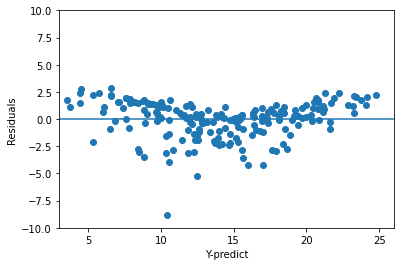

In [24]:
plt.scatter(x=df1['Y-predict'],y=df1['Residuals'])
plt.xlabel('Y-predict')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(3,26)
plt.axhline(0)
plt.show()

## Transforming the response taken as y to logy, to reduce heteroscedacity

In [25]:
x1 = df[['Newspaper', 'TV', 'Radio']]
y1 = np.log(df[['Sales']])

In [26]:
LR = LinearRegression()
LR.fit(x1,y1)

LinearRegression()

In [27]:
y1_pred=LR.predict(x1)

In [28]:
r2_score(y_true=y1,y_pred=y1_pred)

0.7997643719451603

In [29]:
MSE=mean_squared_error(y1, y1_pred)
MSE

0.0342058669129037

In [30]:
mean_absolute_error(y1, y1_pred)

0.11444405706649556

In [31]:
df2=df.copy()
df2['Y-Predict'] = y_pred
df2['Residuals'] = y1 - y1_pred
df2

,TV,Radio,Newspaper,Sales,Y-Predict,Residuals
0,230.1,37.8,69.2,22.1,20.523974,0.041543
1,44.5,39.3,45.1,10.4,12.337855,-0.040295
2,17.2,45.9,69.3,9.3,12.307671,-0.138372
3,151.5,41.3,58.5,18.5,17.597830,0.114660
4,180.8,10.8,58.4,12.9,13.188672,0.006588
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342,0.100406
196,94.2,4.9,8.1,9.7,8.165312,0.126739
197,177.0,9.3,6.4,12.8,12.785921,0.048881
198,283.6,42.0,66.2,25.5,23.767321,-0.060190


In [32]:
df2.describe()

,TV,Radio,Newspaper,Sales,Y-Predict,Residuals
count,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,147.042500,23.264000,30.554000,14.022500,14.022500,4.252154e-16
std,85.854236,14.846809,21.778621,5.217457,4.942038,1.854124e-01
min,0.700000,0.000000,0.300000,1.600000,3.587258,-1.742006e+00
25%,74.375000,9.975000,12.750000,10.375000,10.013118,-5.892167e-02
50%,149.750000,22.900000,25.750000,12.900000,13.945978,4.715202e-02
75%,218.825000,36.525000,45.100000,17.400000,17.677945,1.055292e-01
max,296.400000,49.600000,114.000000,27.000000,24.786870,2.066566e-01


In [34]:
Mean_of_Residuals = np.mean(df2['Residuals'])
Mean_of_Residuals

4.2521541843143496e-16

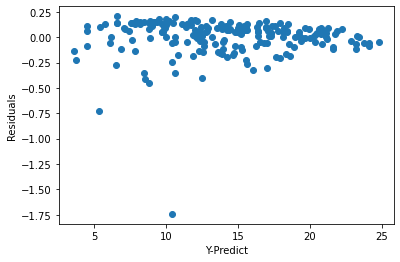

In [46]:
plt.scatter(x=df2['Y-Predict'],y=df2['Residuals'])
plt.xlabel('Y-Predict')
plt.ylabel('Residuals')
plt.show()

## Using Histogram

(-6.0, 5.0)

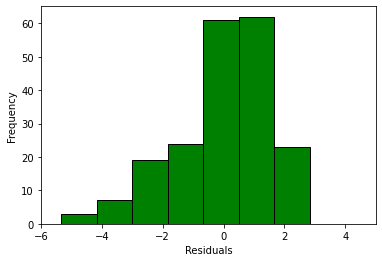

In [47]:
plt.hist(df1['Residuals'],edgecolor='Black',color='Green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-6,5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


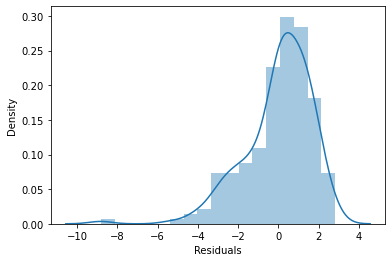

In [48]:
sns.distplot(df1['Residuals'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


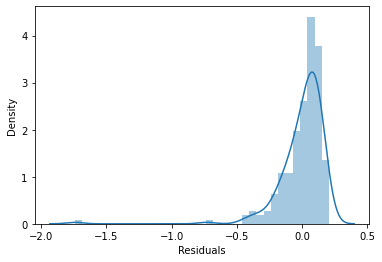

In [49]:
sns.distplot(df2['Residuals'])
plt.show()

## Using Q-Q Plot

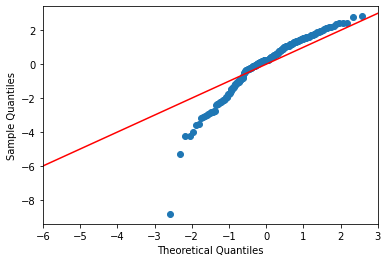

In [51]:
sm.qqplot(df1['Residuals'], line='45')
plt.xlim(-6,3)
plt.show()

## Auto - Correlation between Residuals

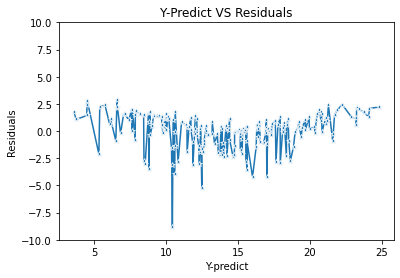

In [57]:
sns.lineplot(x=df1['Y-predict'],y=df1['Residuals'],marker='*').set(title='Y-Predict VS Residuals')
plt.ylim(-10,10)
plt.show()

## Dependent variable taken as logy

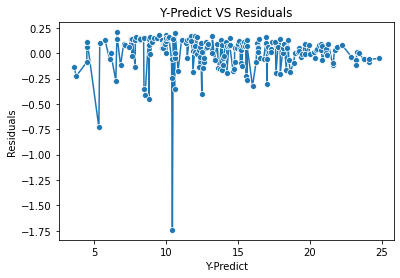

In [65]:
sns.lineplot(x=df2['Y-Predict'],y=df2['Residuals'],marker='o').set(title='Y-Predict VS Residuals')
plt.show()